In [1]:
# These are the libraries we are going to use in the lab.

import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

In [11]:
class plot_error_surfaces(object):
    # constructor
    def __init__(self, w_range, b_range, X, Y, n_samples=30, go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y-w2*self.x+b2)**2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z,
                                                   rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [3]:
torch.manual_seed(1)

In [4]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1*X-1
Y = f + 0.1 * torch.randn(X.size())

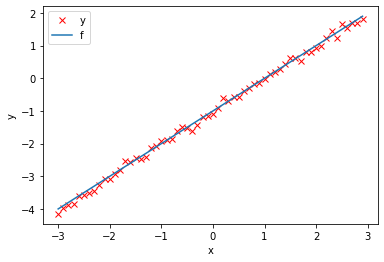

In [5]:
# Plot out the data dots and line

plt.plot(X.numpy(), Y.numpy(), 'rx', label='y')
plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [30]:
# Define the forward function

def forward(x):
    return w * x + b

In [31]:
# Define the MSE Loss function

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

<Figure size 432x288 with 0 Axes>

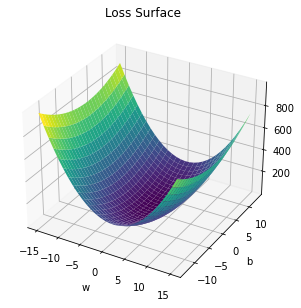

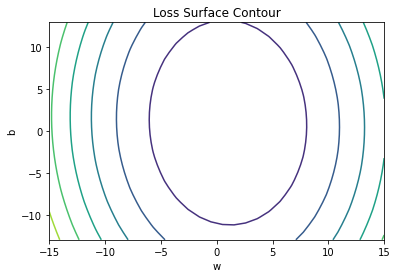

In [32]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30)

In [13]:
w = torch.tensor(-15.0,requires_grad = True)
b = torch.tensor(-10.0,requires_grad = True)

lr = 0.1
LOSS_BGD = []



In [15]:
def train_model(iter):
    for epoch in range(iter):
    
        Yhat = forward(X)
        loss = criterion(Yhat,Y)
        get_surface.set_para_loss(w.data.tolist(),b.data.tolist(),loss.tolist())
        get_surface.plot_ps()
        LOSS_BGD.append(loss)
    
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
    
        w.grad.data.zero_()
        b.grad.data.zero_()

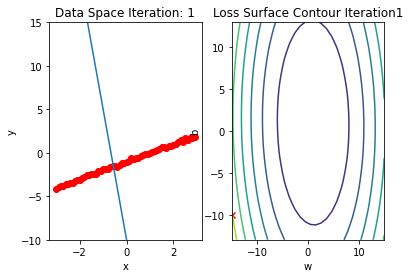

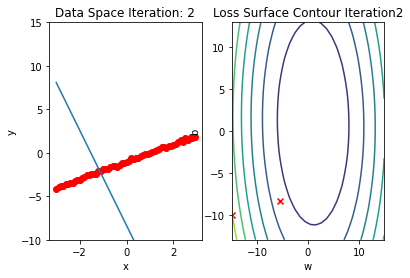

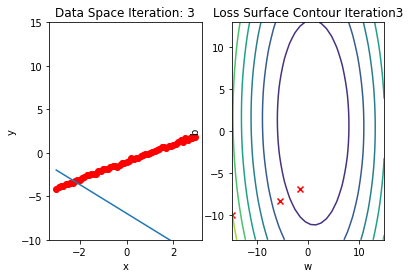

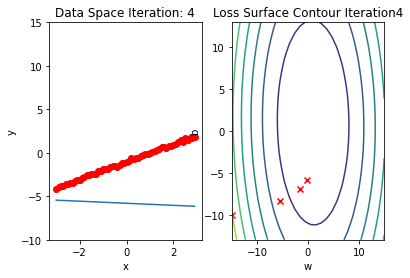

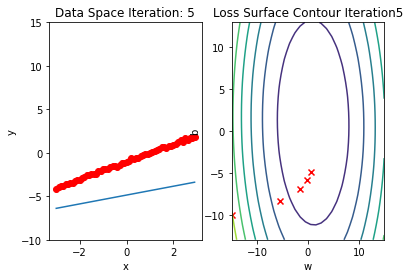

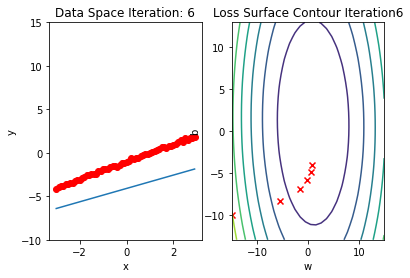

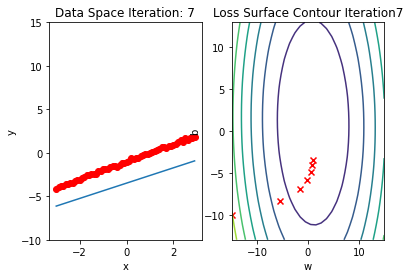

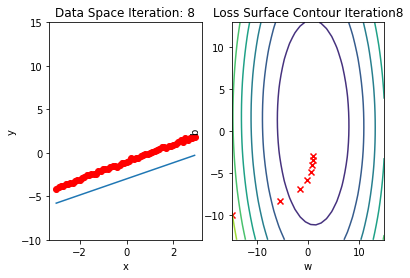

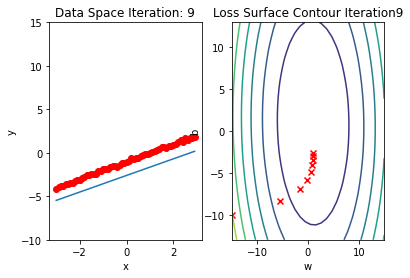

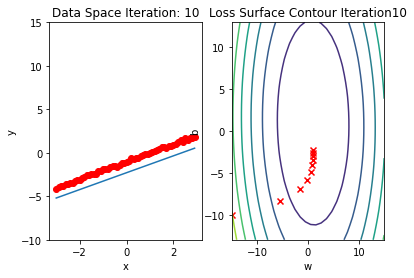

In [16]:
# Train the model with 10 iterations

train_model(10)

## SGD

In [18]:
# Import the library for DataLoader

from torch.utils.data import Dataset, DataLoader
# Dataset Class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index], self.y[index]
    
    # Return the length
    def __len__(self):
        return self.len

In [19]:
# Create the dataset and check the length

dataset = Data()
print("The length of dataset: ", len(dataset))

The length of dataset:  60


In [20]:
# Print the first point

x, y = dataset[0]
print("(", x, ", ", y, ")")

( tensor([-3.]) ,  tensor([-4.]) )


In [21]:
# Print the first 3 point

x, y = dataset[0:3]
print("The first 3 x: ", x)
print("The first 3 y: ", y)

The first 3 x:  tensor([[-3.0000],
        [-2.9000],
        [-2.8000]])
The first 3 y:  tensor([[-4.0000],
        [-3.9000],
        [-3.8000]])


In [43]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)


tensor([[-4.1526],
        [-3.9750],
        [-3.8654],
        [-3.8609],
        [-3.6100],
        [-3.5609],
        [-3.4980],
        [-3.4609],
        [-3.2712],
        [-3.0696],
        [-3.0777],
        [-2.9251],
        [-2.8222],
        [-2.5313],
        [-2.5772],
        [-2.4532],
        [-2.4697],
        [-2.4161],
        [-2.1300],
        [-2.0801],
        [-1.9134],
        [-1.8756],
        [-1.8663],
        [-1.6193],
        [-1.4898],
        [-1.5176],
        [-1.6246],
        [-1.4446],
        [-1.1939],
        [-1.1618],
        [-1.0798],
        [-0.9132],
        [-0.6121],
        [-0.7072],
        [-0.5842],
        [-0.5773],
        [-0.3801],
        [-0.2954],
        [-0.1847],
        [-0.1476],
        [-0.0111],
        [ 0.1293],
        [ 0.1842],
        [ 0.2971],
        [ 0.4453],
        [ 0.6142],
        [ 0.6249],
        [ 0.5225],
        [ 0.7974],
        [ 0.7977],
        [ 0.9404],
        [ 0.9994],
        [ 1.

In [23]:
# Create DataLoader

trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [48]:
# The function for training the model

w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)
LOSS_Loader = []

def train_model_DataLoader(epochs):
    
    # Loop
    for epoch in range(epochs):
        
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)
        
        # store the loss 
        LOSS_Loader.append(criterion(Yhat, Y).tolist())
        
        for x, y in trainloader:
            
            # make a prediction
            yhat = forward(x)
            
            # calculate the loss
            loss = criterion(yhat, y)
            
            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            
            # Backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
            
            # Updata parameters slope
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr* b.grad.data
            
            # Clear gradients 
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

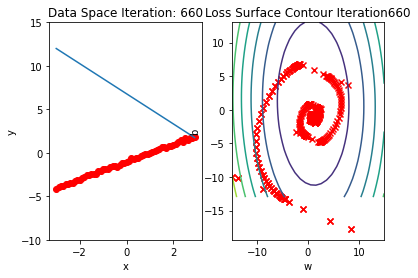

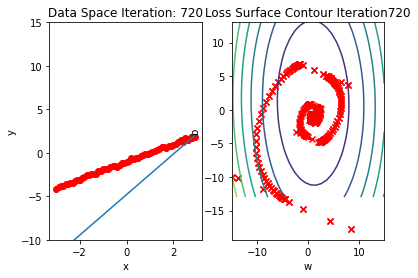

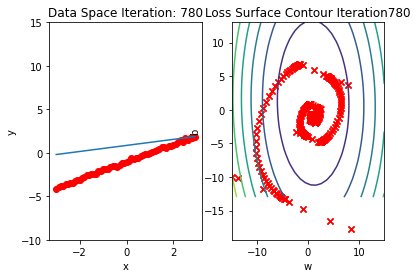

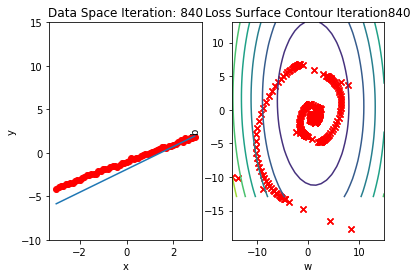

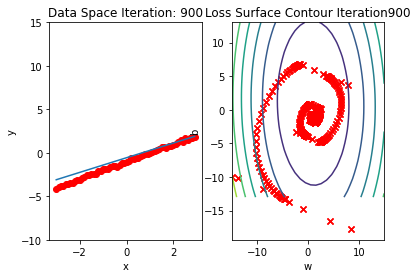

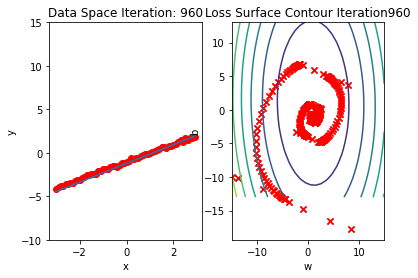

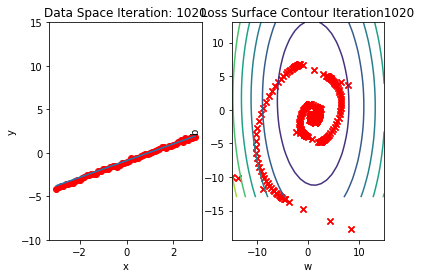

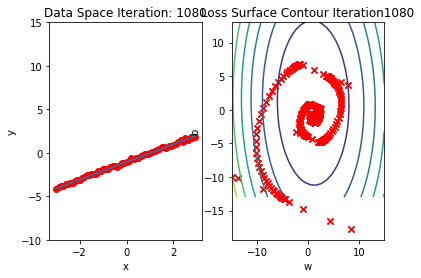

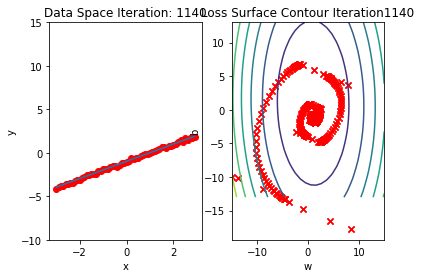

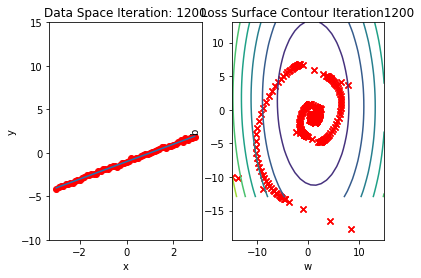

In [49]:
# Run 10 iterations

train_model_DataLoader(10)

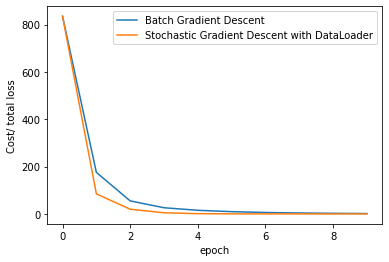

In [50]:
# Plot the LOSS_BGD and LOSS_Loader

plt.plot(LOSS_BGD,label="Batch Gradient Descent")
plt.plot(LOSS_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()